In [36]:
import random
import math
import string

class CountingBloomFilter():
    """
    Implement the counting bloom filter which supports:
    - search: queries the membership of an element
    - insert: inserts a string to the filter
    - delete: removes a string from the filter
    
    Parameters:
        num_item (int): Number of items stored.
        num_hashfn (int): Number of hash functions.
    """
    
    def __init__(self, num_item, num_hashfn):
        """
        Initialize a Counting Bloom Filter
        
        Parameters:
            num_item: int, number of items stored
            num_hashfn: int, number of hash functions
        
        Returns:
            None
        """
        self.num_item = num_item
        self.num_hashfn = num_hashfn
        #intialize all the bits as 0
        self.bucket_size = num_item * 10
        self.bucket = [0] * self.bucket_size
        self.item_stored_count = 0
        
    def str_to_int(self, string, integer=10):
        """
        Assigns each string item an iteger value by summing the product of the \n
        ASCII value of each character
        
        Parameters:
            string: str
            integer: int
        Output:
            integer
        """
        final_int = 0
        for position,char in enumerate(string):
            final_int += ord(char) * (integer ** (len(string) - position - 1))
        return final_int
    
    def hash_cbf(self, item, idx):
        """
        Returns hash values of an item
        
        Parameters:
            item(str): The item to hash
            i(int): The index of the hash function
        
        Returns:
            hash_values(lst): A list of hash values
        """
        key = self.str_to_int(item)
        
        #going through each hash function to find hash value
        def hash_fn1(key):
            """
            Hashes a string using the first hash function
            """
            return key % self.bucket_size
        
        def hash_fn2(key):
            """
            """
            prime = 18
            return prime - (key % prime)
        return (hash_fn1(key) + idx * hash_fn2(key)) % self.bucket_size
    
    
    def search(self, item):
        """
        Queries the membership of an element in the filter
        
        Parameters:
        item(str): The item to search for
        
        Returns:
        bool: tells if the item is there or not
        """
        for i in range(self.num_hashfn):
            # Getting the index of the hash function
            index = self.hash_cbf(item, i)
            if self.bucket[index] == 0:
                return False
        return True
        
    def insert(self, item):
        """
        Inserts an item into the filter
        
        Parameters:
            item(str): The item to insert
        Returns:
            None
        #Ensuring that the filter is not full (available for insertion)
        if self.item_stored_count >= self.num_item:
            raise Exception("The filter is full")
        """   
   
        for i in range (self.num_hashfn):
            index = self.hash_cbf(item, i)
            #incrementing the counter value
            self.bucket[index] += 1
            
        self.item_stored_count += 1
        
    def delete(self, item):
        """
        Removes an item from the filter
        
        Parameters:
        item(str): The item to remove
        """
        #Ensuring that the item exists in the CBF
        item_exists = self.search(item)
        if item_exists:
            for i in range(self.num_hashfn):
                index = self.hash_cbf(item, i)
                #decrementing the counter value
                self.bucket[index] -= 1
            self.item_stored_count -= 1
        else:
            raise ValueError("Item does not exist in the filter")
            
    def __str__(self):
        """
        Returns a string representation of the filter
        """
        return str(self.bucket)

In [37]:
def calculate_fpr(input_words, test_words, num_hashfn):
    """
    Calculates the false positive rate of the Counting Bloom Filter
    Parameters:
    input_words(list): list of words to be inserted into CBF
    test_words(list): list of words to be tested for existence
    
    Returns:
    fpr(float): the false-positive rate of the CBF
    """
    num_items = len(input_words)
    cbf = CountingBloomFilter(num_items, num_hashfn)
    
    #Inserting the input words into the counting bloom filter
    for word in input_words:
        cbf.insert(word)
    
    #Checking if all the test words exist
    false_positive_words = 0
    for word in test_words:
        if cbf.search(word) == True:
            false_positive_words += 1
            
    fpr = false_positive_words / len(test_words)        
    print(f"Num Hash Functions: {num_hashfn}, False Positives: {false_positive_words}, Total Test Words: {len(test_words)}")
    
    #Calculating the false-positive rate
    return fpr

In [38]:
calculate_fpr(version_1, version_2, 8)

Num Hash Functions: 8, False Positives: 8461, Total Test Words: 8461


1.0

In [39]:
colors = ['red', 'black', 'blue', 'green', 'yellow', 'purple', 'orange', 'gray']
#Create a CBF to store 8 elements with 5 hash functions
colors_CBF = CountingBloomFilter(8, 5)

#Testing Insertion Operation
for color in colors:
    colors_CBF.insert(color)
    
for color in colors:
    assert colors_CBF.search(color) == True
print("Insertion Tests passed")

#Testing Search Operation
tests = {
    'blue':True,
    'yellow': True,
    'violet': False,
    'blueyellow': False,
    'purple': True,
    'verypurple': False
}
for item, expected in tests.items():
    actual = colors_CBF.search(item)
    assert actual == expected, f"Expected {expected} but got {actual} for {item}"
print("Search Tests passed")


#Testing Delete Operation

to_delete = ['red', 'blue', 'purple']

for item in to_delete:
    colors_CBF.delete(item)
for item in to_delete:
    assert colors_CBF.search(item) == False, f"Expected None but got {colors_CBF.search(item)} for {item}"
print("Deletion Tests passed")

Insertion Tests passed
Search Tests passed
Deletion Tests passed


In [40]:
url_version_1 = 'https://bit.ly/39MurYb'
url_version_2 = 'https://bit.ly/3we1QCp'
url_version_3 = 'https://bit.ly/3vUecRn'

url = 'https://gist.githubusercontent.com/raquelhr/78f66877813825dc344efefdc684a5d6/raw/361a40e4cd22cb6025e1fb2baca3bf7e166b2ec6/'

from requests import get

def get_txt_into_list_of_words(url):
    '''
    Cleans the text data
    
    Input
    ----------
    url : string
    The URL for the txt file.
    
    Returns
    -------
    data_just_words_lower_case: list
    List of "cleaned-up" words sorted by the order they appear in the original file.
    '''
    bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', '(', ')', '*']
    data = get(url).text
    data = ''.join(c for c in data if c not in bad_chars)
    data_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in data)
    data_just_words = [word for word in data_without_newlines.split(" ") if word != ""]
    data_just_words_lower_case = [word.lower() for word in data_just_words]
    return data_just_words_lower_case

version_1 = get_txt_into_list_of_words(url_version_1)
version_2 = get_txt_into_list_of_words(url_version_2)
version_3 = get_txt_into_list_of_words(url_version_3)
whole_text = get_txt_into_list_of_words(url)

In [41]:
print(len(version_1), len(version_2), len(version_3), len(whole_text))

8461 8461 8554 903969


In [42]:
print(f"Length of version_1: {len(version_1)}")
print(f"Sample words: {version_1[:10]}")  # Display the first 10 words for inspection

Length of version_1: 8461
Sample words: ['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'complete', 'works', 'of', 'william']


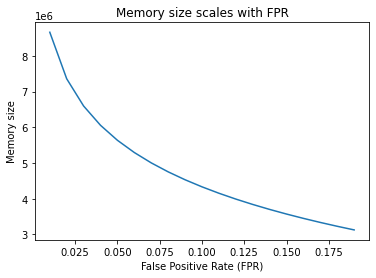

In [43]:
# Memory size scales with FPR
fprs = [0.01 * i for i in range(1, 20)]
memory_sizes = []

for fpr in fprs:
    # Number of items stored in the counting bloom filter
    n = len(whole_text)
    
    #Optimal size of the counting bloom filter
    m = round(- (n * math.log(fpr)) / (math.log(2) ** 2))
    
    #Optimal number of hash functions
    k = round((m / n) * math.log(2))
    
    cbf = CountingBloomFilter(n, k)
    for word in whole_text:
        cbf.insert(word)
    memory_sizes.append(m)

# Plotting graphs
plt.plot(fprs, memory_sizes)
plt.title("Memory size scales with FPR")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("Memory size")
plt.show()

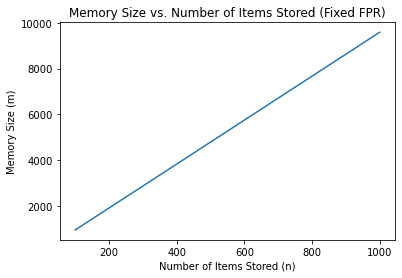

In [38]:
# THEORETICAL ANALYSIS
# Memory size scales with the number of items stored for a fixed FPR

import math
import matplotlib.pyplot as plt

# Fixed False Positive Rate
FPR = 0.01

# Vary the number of items stored (n)
n_values = list(range(100, 1001, 100))

# Calculate memory sizes (m) for each n
memory_sizes = [- (n * math.log(FPR)) / (math.log(2) ** 2) for n in n_values]

# Plotting graph
plt.plot(n_values, memory_sizes)
plt.title("Memory Size vs. Number of Items Stored (Fixed FPR)")
plt.xlabel("Number of Items Stored (n)")
plt.ylabel("Memory Size (m)")
plt.show()


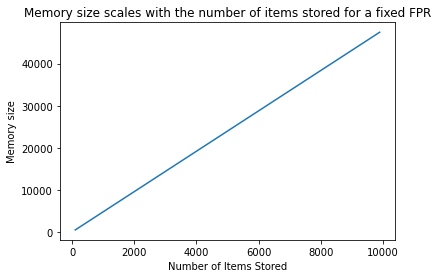

In [12]:
# EMPIRICAL ANALYSIS
# Memory size scales with the number of items stored for a fixed FPR
num_items = [100 * i for i in range(1, 100)]
fixed_fpr = 0.1  # Fixed False Positive Rate

memory_sizes = []

for n in num_items:
    # Optimal size of the counting bloom filter for the fixed FPR
    m = round(- (n * math.log(fixed_fpr)) / (math.log(2) ** 2))
    
    # Optimal number of hash functions
    k = round((m / n) * math.log(2))
    
    cbf = CountingBloomFilter(n, k)
    for word in whole_text[:n]:  # Use the first n items from the dataset
        cbf.insert(word)
    
    # Append the size of the counting bloom filter's memory
    memory_sizes.append(m)

# Plotting graphs
plt.plot(num_items, memory_sizes)
plt.title("Memory size scales with the number of items stored for a fixed FPR")
plt.xlabel("Number of Items Stored")
plt.ylabel("Memory size")
plt.show()


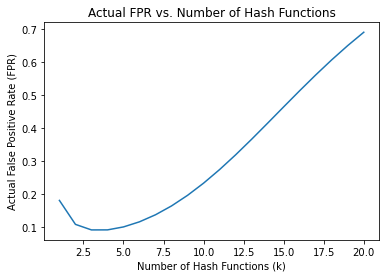

In [13]:
# THEORETICAL ANALYSIS
# Actual FPR scales with the number of hash functions

import math
import matplotlib.pyplot as plt

# Fixed bits
m = 10000
n = 2000

# Vary the number of hash functions (k)
num_hashfn_values = list(range(1, 21, 1))

# Calculate actual FPR for each number of hash functions
actual_fpr_values = [(1 - math.exp(-k * n / m)) ** k for k in num_hashfn_values]

# Plotting graph
plt.plot(num_hashfn_values, actual_fpr_values)
plt.title("Actual FPR vs. Number of Hash Functions")
plt.xlabel("Number of Hash Functions (k)")
plt.ylabel("Actual False Positive Rate (FPR)")
plt.show()


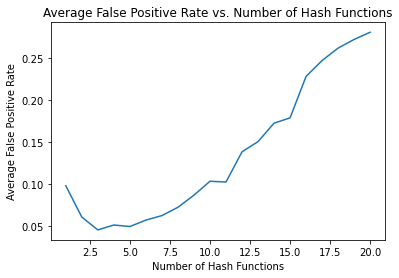

In [89]:
# EMPIRICAL ANALYSIS
# Actual FPR scales with the number of hash functions
def fpr_scales_hashfns(version_1, num_hashfn_values, num_trials):
    fpr_values = []

    for num_hashfn in num_hashfn_values:
        total_false_positives = 0

        for _ in range(num_trials):
            # Create a counting bloom filter with the varying number of hash functions
            cbf = CountingBloomFilter(len(set(version_1)), num_hashfn)

            # Insert all words from version_1 into the counting bloom filter
            for word in version_1:
                cbf.insert(word)

            # Check if other random words are falsely identified as present
            test_words = [f"random_word_{i}" for i in range(len(set((version_1))))]
            false_positives = sum(cbf.search(word) for word in test_words)

            total_false_positives += false_positives

        # Calculate the average false positive rate for the current configuration
        average_fpr = total_false_positives / (num_trials * len(test_words))
        fpr_values.append(average_fpr)

    return fpr_values


num_hashfn_values = list(range(1, 21))
num_trials = 10

fpr_values = fpr_scales_hashfns(version_1, num_hashfn_values, num_trials)

plt.plot(num_hashfn_values, fpr_values)
plt.xlabel("Number of Hash Functions")
plt.ylabel("Average False Positive Rate")
plt.title("Average False Positive Rate vs. Number of Hash Functions")
plt.show()

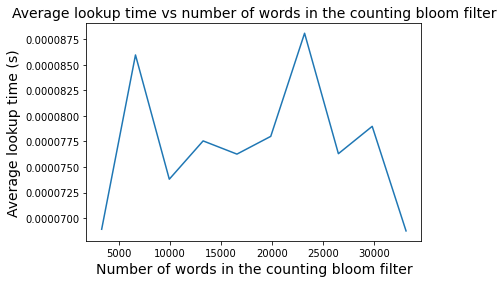

In [32]:
# Access time to hashed values scales with the number of items stored in a 
# CBF kept at constant FPR

import time 

num_hash_functions = [x for x in range(1,20)]
words_list = list(set(whole_text))
n = len(set(whole_text))
fpr = 0.01
m = round(- (n * math.log(fpr)) / (math.log(2) ** 2))
k = round((m / n) * math.log(2))
num_hashfns_count = len(num_hash_functions)

# split the list of unique words into a certian number of parts based on␣ the number of hash functions
parts_dict = {}

for idx in range(num_hashfns_count):
# get the index of the words to be inderted into the counting bloom filter
    start_idx = idx * n // num_hashfns_count
    end_idx = (idx + 1) * n // num_hashfns_count
    
    # get the words to be inserted into the counting bloom filter
    words = words_list[start_idx:end_idx]
    # add the words to the dictionary
    parts_dict[idx] = words

sections = 10
section_dict = {}
times = []

# Divide the unique words into sections
for idx in range(sections):
    # Get the index range of the words to be inserted into the counting bloom filter
    start_idx = 0
    end_idx = (idx + 1) * n // sections
    
    # Get the words to be inserted into the counting bloom filter
    words = words_list[start_idx:end_idx]
    
    # Add the words to the dictionary
    section_dict[idx] = words

# Measure average lookup time for each section
for idx, words in section_dict.items():
    # Create a counting bloom filter to store the input words
    num_items = len(words)
    cbf = CountingBloomFilter(num_items, k)
    
    # Insert the input words into the counting bloom filter
    for word in words:
        cbf.insert(word)

    # Loop through the words in the section and check if they exist in the counting bloom filter
    total_time = 0
    for word in words:
        start = time.time()
        cbf.search(word)
        end = time.time()
        total_time += end - start

    # Calculate the average time it takes to check if a word exists in the counting bloom filter
    avg_time = total_time / len(words)
    times.append(avg_time)

# Plotting graphs
plt.ticklabel_format(style='plain', axis='y')
plt.plot([len(section_dict[x]) for x in range(sections)], times)
plt.xlabel("Number of words in the counting bloom filter", fontsize=14)
plt.ylabel("Average lookup time (s)", fontsize=14)
plt.title("Average lookup time vs number of words in the counting bloom filter", fontsize=14)
plt.show()

In [10]:
#First Version: similar words checker
def plagiarism_percentage_v1 (main_text, reference_text):
    """
    Determines how similar a test is to a given reference text
    
    Parameters:
    main_text: list of str
        Words in a text to be checked for plagiarism
    reference_text: list of str
        Words of the reference test to check plagiarism
        
    Returns:
    float
        The percentage of plagiarism in text_1
    """
    #Create a counting bloom filter to store the words in the reference text
    num_item = len(reference_text)
    cbf = CountingBloomFilter(num_item, 3)
    
    #Inserting the words of the reference text into the CBF
    for word in set(reference_text):
        #set() was used to elimiate duplicate words and only consider each word once
        cbf.insert(word)
        
    similar_words_count = 0
    for word in set(main_text):
        if cbf.search(word):
            similar_words_count += 1
    
    similarity_percent = similar_words_count / len(main_text) * 100
    return similarity_percent

percent_1_2 = plagiarism_percentage_v1(version_1, version_2)
percent_2_3 = plagiarism_percentage_v1(version_2, version_3)
percent_1_3 = plagiarism_percentage_v1(version_1, version_3)

print(f"Percentage of overlapped words between version 1 and version 2: {percent_1_2:.2f}%")
print(f"Percentage of overlapped words between version 2 and version 3: {percent_2_3:.2f}%")
print(f"Percentage of overlapped words between version 1 and version 3: {percent_1_3:.2f}%")

Percentage of overlapped words between version 1 and version 2: 26.33%
Percentage of overlapped words between version 2 and version 3: 26.33%
Percentage of overlapped words between version 1 and version 3: 26.33%


In [11]:
#Second Version: similar groups of words
def group_consecutive_words (words, w):
    """
    Groups words into groups of n words
    
    Parameters:
    - words(str): list of str
        The words to be grouped
    - w (int)
        The number of words per group
    
    Returns:
    combined_words: list of str
        The list of groups of words
    """
    
    combined_words = []
    for idx in range(0, len(words), w):
        group = ''.join(words[idx:idx + w])
        combined_words.append(group)
    return combined_words

def plagiarism_percentage_v2 (main_text, reference_text, w):
    """
    Determines how similar a test is to a given reference text
    
    Parameters:
    main_text: list of str
        Words in a text to be checked for plagiarism
    reference_text: list of str
        Words of the reference test to check plagiarism
        
    Returns:
    float
        The percentage of plagiarism in main_text
    """
    #Create a counting bloom filter to store the words in the reference text
    num_item = len(reference_text)
    cbf = CountingBloomFilter(num_item, 3)
    
    #Inserting the words of the reference text into the CBF
    
    for word in set(reference_text):
        #set() is used to eliminate duplicate words and consider each word once
        
        cbf.insert(word)
        
    #Group the words in groups of n words
    
    main_text = group_consecutive_words(main_text, w)
    reference_text = group_consecutive_words(reference_text, w)
    
    similar_words_count = 0
    for word in set(main_text):
        if cbf.search(word):
            similar_words_count += 1
    
    similarity_percent = similar_words_count / len(main_text) * 100

    #Checking for plagiarism
    plagiarism = similarity_percent > 1
    
    return similarity_percent

In [85]:
result_1_2 = plagiarism_percentage_v2(version_1, version_2, 2)
result_2_3 = plagiarism_percentage_v2(version_2, version_3, 2)
result_1_3 = plagiarism_percentage_v2(version_1, version_3, 2)

print(f"Plagiarism between version 1 and version 2: {result_1_2[0]}, Percentage: {result_1_2[1]:.2f}%")
print(f"Plagiarism between version 2 and version 3: {result_2_3[0]}, Percentage: {result_2_3[1]:.2f}%")
print(f"Plagiarism between version 1 and version 3: {result_1_3[0]}, Percentage: {result_1_3[1]:.2f}%")

Plagiarism between version 1 and version 2: False, Percentage: 0.52%
Plagiarism between version 2 and version 3: False, Percentage: 0.85%
Plagiarism between version 1 and version 3: True, Percentage: 1.09%


In [86]:
result_1_2 = plagiarism_percentage_v2(version_1, version_2, 4)
result_2_3 = plagiarism_percentage_v2(version_2, version_3, 4)
result_1_3 = plagiarism_percentage_v2(version_1, version_3, 4)

print(f"Plagiarism between version 1 and version 2: {result_1_2[0]}, Percentage: {result_1_2[1]:.2f}%")
print(f"Plagiarism between version 2 and version 3: {result_2_3[0]}, Percentage: {result_2_3[1]:.2f}%")
print(f"Plagiarism between version 1 and version 3: {result_1_3[0]}, Percentage: {result_1_3[1]:.2f}%")

Plagiarism between version 1 and version 2: False, Percentage: 0.47%
Plagiarism between version 2 and version 3: False, Percentage: 0.85%
Plagiarism between version 1 and version 3: False, Percentage: 0.71%


In [88]:
result_1_2 = plagiarism_percentage_v2(version_1, version_2, 15)
result_2_3 = plagiarism_percentage_v2(version_2, version_3, 15)
result_1_3 = plagiarism_percentage_v2(version_1, version_3, 15)

print(f"Plagiarism between version 1 and version 2: {result_1_2[0]}, Percentage: {result_1_2[1]:.2f}%")
print(f"Plagiarism between version 2 and version 3: {result_2_3[0]}, Percentage: {result_2_3[1]:.2f}%")
print(f"Plagiarism between version 1 and version 3: {result_1_3[0]}, Percentage: {result_1_3[1]:.2f}%")

Plagiarism between version 1 and version 2: False, Percentage: 0.35%
Plagiarism between version 2 and version 3: False, Percentage: 0.53%
Plagiarism between version 1 and version 3: False, Percentage: 0.88%


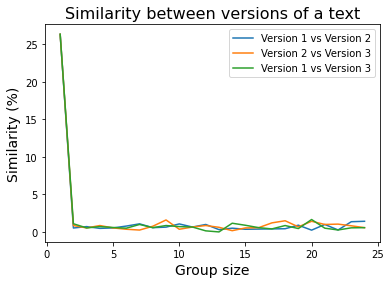

In [98]:
words_each_group = [w for w in range(1, 25)]
similarities = []
num_trials = 10

for i in words_each_group:
    # Initializing the values
    result_1_2 = 0
    result_2_3 = 0
    result_1_3 = 0
    
    for _ in range(num_trials):
        # Computing the similarity between the three versions for each trial
        result_1_2 += plagiarism_percentage_v2(version_1, version_2, i)
        result_2_3 += plagiarism_percentage_v2(version_2, version_3, i)
        result_1_3 += plagiarism_percentage_v2(version_1, version_3, i)
        
    # Calculating the average similarity percentage
    similarities.append([result_1_2 / num_trials, result_2_3/ num_trials, result_1_3 / num_trials])

plt.plot(words_each_group, similarities)
plt.legend(["Version 1 vs Version 2", "Version 2 vs Version 3", "Version 1 vs Version 3"])
plt.xlabel("Group size", fontsize=14)
plt.ylabel("Similarity (%)", fontsize=14)
plt.title("Similarity between versions of a text", fontsize=16)
plt.show()

In [7]:
def word_for_word_comparison (text_1, reference_1):
    """
    Determines how similar a test is to a given reference text
    by comparing word by word
    
    Parameters:
    text_1: list of str
        Words in a text to be checked for plagiarism
    reference_1: list of str
        Words of the reference test to check plagiarism
        
    Returns:
    float
        The percentage of plagiarism in text_1
    """
    similar_words = 0
    for word in text_1:
        #Checking if the word exists in the reference text
        if word in reference_1:
            similar_words += 1
    
    #Calculating the percentage of words in text_1 that are similar to reference_1
    plagiarism_percent = similar_words / len(text_1) * 100
    return plagiarism_percent

percent_1_2 = word_for_word_comparison(version_1, version_2)
percent_2_3 = word_for_word_comparison(version_2, version_3)
percent_1_3 = word_for_word_comparison(version_1, version_3)

print(f"Percentage of overlapped words between version 1 and version 2: {percent_1_2:.2f}%")
print(f"Percentage of overlapped words between version 2 and version 3: {percent_2_3:.2f}%")
print(f"Percentage of overlapped words between version 1 and version 3: {percent_1_3:.2f}%")

Percentage of overlapped words between version 1 and version 2: 100.00%
Percentage of overlapped words between version 2 and version 3: 100.00%
Percentage of overlapped words between version 1 and version 3: 100.00%


In [8]:
def set_of_words_similarity(text_2, reference_2):
    """
    Determine how similar a test is based on the number of common words
    
    Parameters:
    text_2: list of str
        The words in the first document
    reference_2: list of str
        The words in the second document
        
    Returns:
    float
        The similarity percentage between the two documents
    """
    
    common_words = set()
    for word in set(text_2):
        if word in set(reference_2):
            common_words.add(word)
    
    # Calculate common words relative to the size of text_2
    similarity = len(common_words) / len(text_2) * 100
    
    return similarity

percent_1_2 = set_of_words_similarity(version_1, version_2)
percent_2_3 = set_of_words_similarity(version_2, version_3)
percent_1_3 = set_of_words_similarity(version_1, version_3)

print(f"Percentage of overlapped words between version 1 and version 2: {percent_1_2:.2f}%")
print(f"Percentage of overlapped words between version 2 and version 3: {percent_2_3:.2f}%")
print(f"Percentage of overlapped words between version 1 and version 3: {percent_1_3:.2f}%")


Percentage of overlapped words between version 1 and version 2: 26.33%
Percentage of overlapped words between version 2 and version 3: 26.33%
Percentage of overlapped words between version 1 and version 3: 26.33%


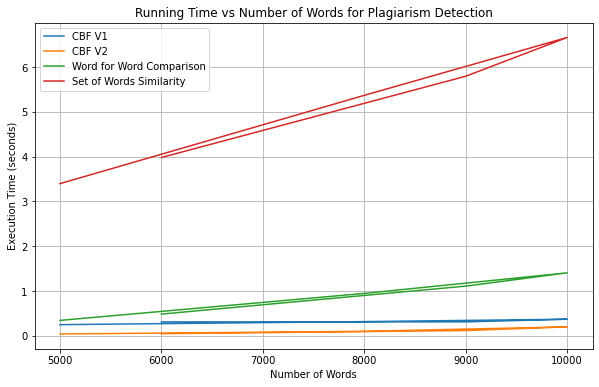

In [35]:
import time
import matplotlib.pyplot as plt
import random

# Function to generate random words for testing
def generate_random_words(num_words):
    return [str(i) for i in range(num_words)]

# Function to group consecutive words
def group_consecutive_words(words, w):
    combined_words = []
    for idx in range(0, len(words), w):
        group = ''.join(words[idx:idx + w])
        combined_words.append(group)
    return combined_words

# Function for plagiarism detection using group_consecutive_words
def plagiarism_percentage_v2(main_text, reference_text, w):
    main_text = group_consecutive_words(main_text, w)
    reference_text = group_consecutive_words(reference_text, w)

    similar_words_count = sum(word in reference_text for word in set(main_text))
    similarity_percent = similar_words_count / len(main_text) * 100

    plagiarism = similarity_percent > 1
    return similarity_percent


def plagiarism_percentage_v1 (main_text, reference_text):
    num_item = len(reference_text)
    cbf = CountingBloomFilter(num_item, 3)
    
    for word in set(reference_text):
        cbf.insert(word)
        
    similar_words_count = 0
    for word in set(main_text):
        if cbf.search(word):
            similar_words_count += 1
    similarity_percent = similar_words_count / len(main_text) * 100
    return similarity_percent


# Function for word-for-word comparison
def word_for_word_comparison(text, reference):
    similar_words = sum(word in reference for word in text)
    plagiarism_percent = similar_words / len(text) * 100
    return plagiarism_percent

# Function for set of words similarity
def set_of_words_similarity(text, reference):
    common_words = set(word for word in set(text) if word in set(reference))
    similarity = len(common_words) / len(text) * 100
    return similarity

# Function to measure the execution time of plagiarism detection
def time_plagiarism_detection(main_text, reference_text, detection_function, *args):
    start_time = time.time()
    detection_function(main_text, reference_text, *args)
    return time.time() - start_time

# Define a range of values for the number of words
num_words_values = [5000, 8000, 10000, 9000, 6000]

# Generate random words for testing
main_text = generate_random_words(max(num_words_values))
reference_text = generate_random_words(max(num_words_values))

# Measure execution time for different numbers of words for each function
time_v1 = [time_plagiarism_detection(main_text[:num_words], reference_text, plagiarism_percentage_v1) for num_words in num_words_values]
time_v2 = [time_plagiarism_detection(main_text[:num_words], reference_text, plagiarism_percentage_v2, w) for num_words, w in zip(num_words_values, [3, 3, 3, 3, 3])]
time_v3 = [time_plagiarism_detection(main_text[:num_words], reference_text, word_for_word_comparison) for num_words in num_words_values]
time_v4 = [time_plagiarism_detection(main_text[:num_words], reference_text, set_of_words_similarity) for num_words in num_words_values]

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(num_words_values, time_v1, label='CBF V1')
plt.plot(num_words_values, time_v2, label='CBF V2')
plt.plot(num_words_values, time_v3, label='Word for Word Comparison')
plt.plot(num_words_values, time_v4, label='Set of Words Similarity')

plt.title('Running Time vs Number of Words for Plagiarism Detection')
plt.xlabel('Number of Words')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()
